# How to Visualized Text Dataset?

![](https://images.unsplash.com/photo-1475154404624-07909433bbfb?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1266&q=80)

> Please leave a reference when using code or taking ideas in my visualizations.

When proceeding with text data EDA, I wonder what kind of visualization can be done except for word distribution and wordcloud.

I would like to introduce you to various ways to visualize text.

## Import Library & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

- dataset source : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

In [2]:
!unzip ../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip

Archive:  ../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
  inflating: train.csv               


In [3]:
train = pd.read_csv('./train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# https://www.kaggle.com/subinium/dark-mode-visualization-apple-version

from cycler import cycler

raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 200

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [5]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## I. Highlight is all you need.

When reading a document, highlighting is the best way to highlight the areas you want to see.

If you have a word you want to see or a part of speech you want to see, use it to highlight it,

If there is a weight for each word, you can use it to highlight it. Depending on the weight type, you can select divergent or continuous type.

### I-1. Highlight your output (console)

- https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal
    - https://github.com/ikalnytskyi/termcolor
    - https://github.com/feluxe/sty
    - https://github.com/erikrose/blessings
    - https://github.com/willmcgugan/rich

For explain, I use `termcolor` library.


In [6]:
from termcolor import colored, cprint

print(colored('hello', 'red'), colored('world', 'green'))
print(colored("hello red world", 'red'))

hello world
hello red world


- Text Color
    - grey
    - red
    - green
    - yellow
    - blue
    - magenta
    - cyan
    - white
 
- Text highlights
    * on_grey
    * on_red
    * on_green
    * on_yellow
    * on_blue
    * on_magenta
    * on_cyan
    * on_white

In [7]:
def word_highligt(txt, word, color=None, highlight=None, attr=None):
    if isinstance(word, str):
        txt = txt.replace(word, colored(word, color, highlight))
    else : 
        if not isinstance(color, list): 
            color = [color] * len(word)
        if not isinstance(highlight, list):
            highlight = [highlight] * len(word)
        for w, c, h in zip(word, color, highlight):
            txt = txt.replace(w, colored(w, c, h))
    return txt

- Case 1 : single word highlihgt

In [8]:
print(word_highligt(train.iloc[1]['comment_text'], 'with', None, 'on_red'))

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)


- Case 2 : 2 or more words highlihgt with single color

In [9]:
print(word_highligt(train.iloc[1]['comment_text'], ['with', 'Thanks'], 'red', None))

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)


- Case 2 : 2 or more words highlihgt with different color

In [10]:
print(word_highligt(train.iloc[1]['comment_text'], ['with', 'Thanks'], [None, 'cyan'], ['on_red', None]))

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)


### I-2. Highlight your output (html)

The notebook can output the result as HTML. You can use this to highlight a variety of colors.

In [11]:
from IPython.core.display import HTML
HTML("<span style='color:red'>hello</span> word")

In [12]:
def word_highligt_html(txt, word, color='black', highlight=None, attr=None):
    if isinstance(word, str):
        txt = txt.replace(word, f'<span style="color: {color}; background-color:{highlight}">{word}</span>')
    else : 
        if not isinstance(color, list): 
            color = [color] * len(word)
        if not isinstance(highlight, list):
            highlight = [highlight] * len(word)
        for w, c, h in zip(word, color, highlight):

            txt = txt.replace(w, f'<span style="color: {c}; background-color:{h}">{w}</span>')
    return txt

Now you can pass color with rgb hex code.

In [13]:
HTML(word_highligt_html(train.iloc[1]['comment_text'], ['with', 'Thanks'], ['red', 'white'],  [None, '#B19CD9']))

## II. Word/Doc as Vector

Using Word2Vec and Dimension Reduction, you can check whether text data is clustered.

I used **TF-IDF** to convert the text of the document to a vector for quick execution, and then I used **UMAP** to reduce the dimensions.

To turn a document into a vector, you can use **word2vec, fasttext** (gensim) to average the word weights of the text, or you can use a nlp model to extract the vector.

- https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/doc2vec.py
- https://github.com/jhlau/doc2vec

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

from umap import UMAP

tfidf = TfidfVectorizer() 

train = train.sample(10000)
docs = tfidf.fit_transform(train['comment_text'])
target = train['toxic']

In [15]:
umap = UMAP(random_state=0)
dr = umap.fit_transform(docs, target)

In [16]:
color = [dark_palette[0] if i==0 else dark_palette[1] for i in target]

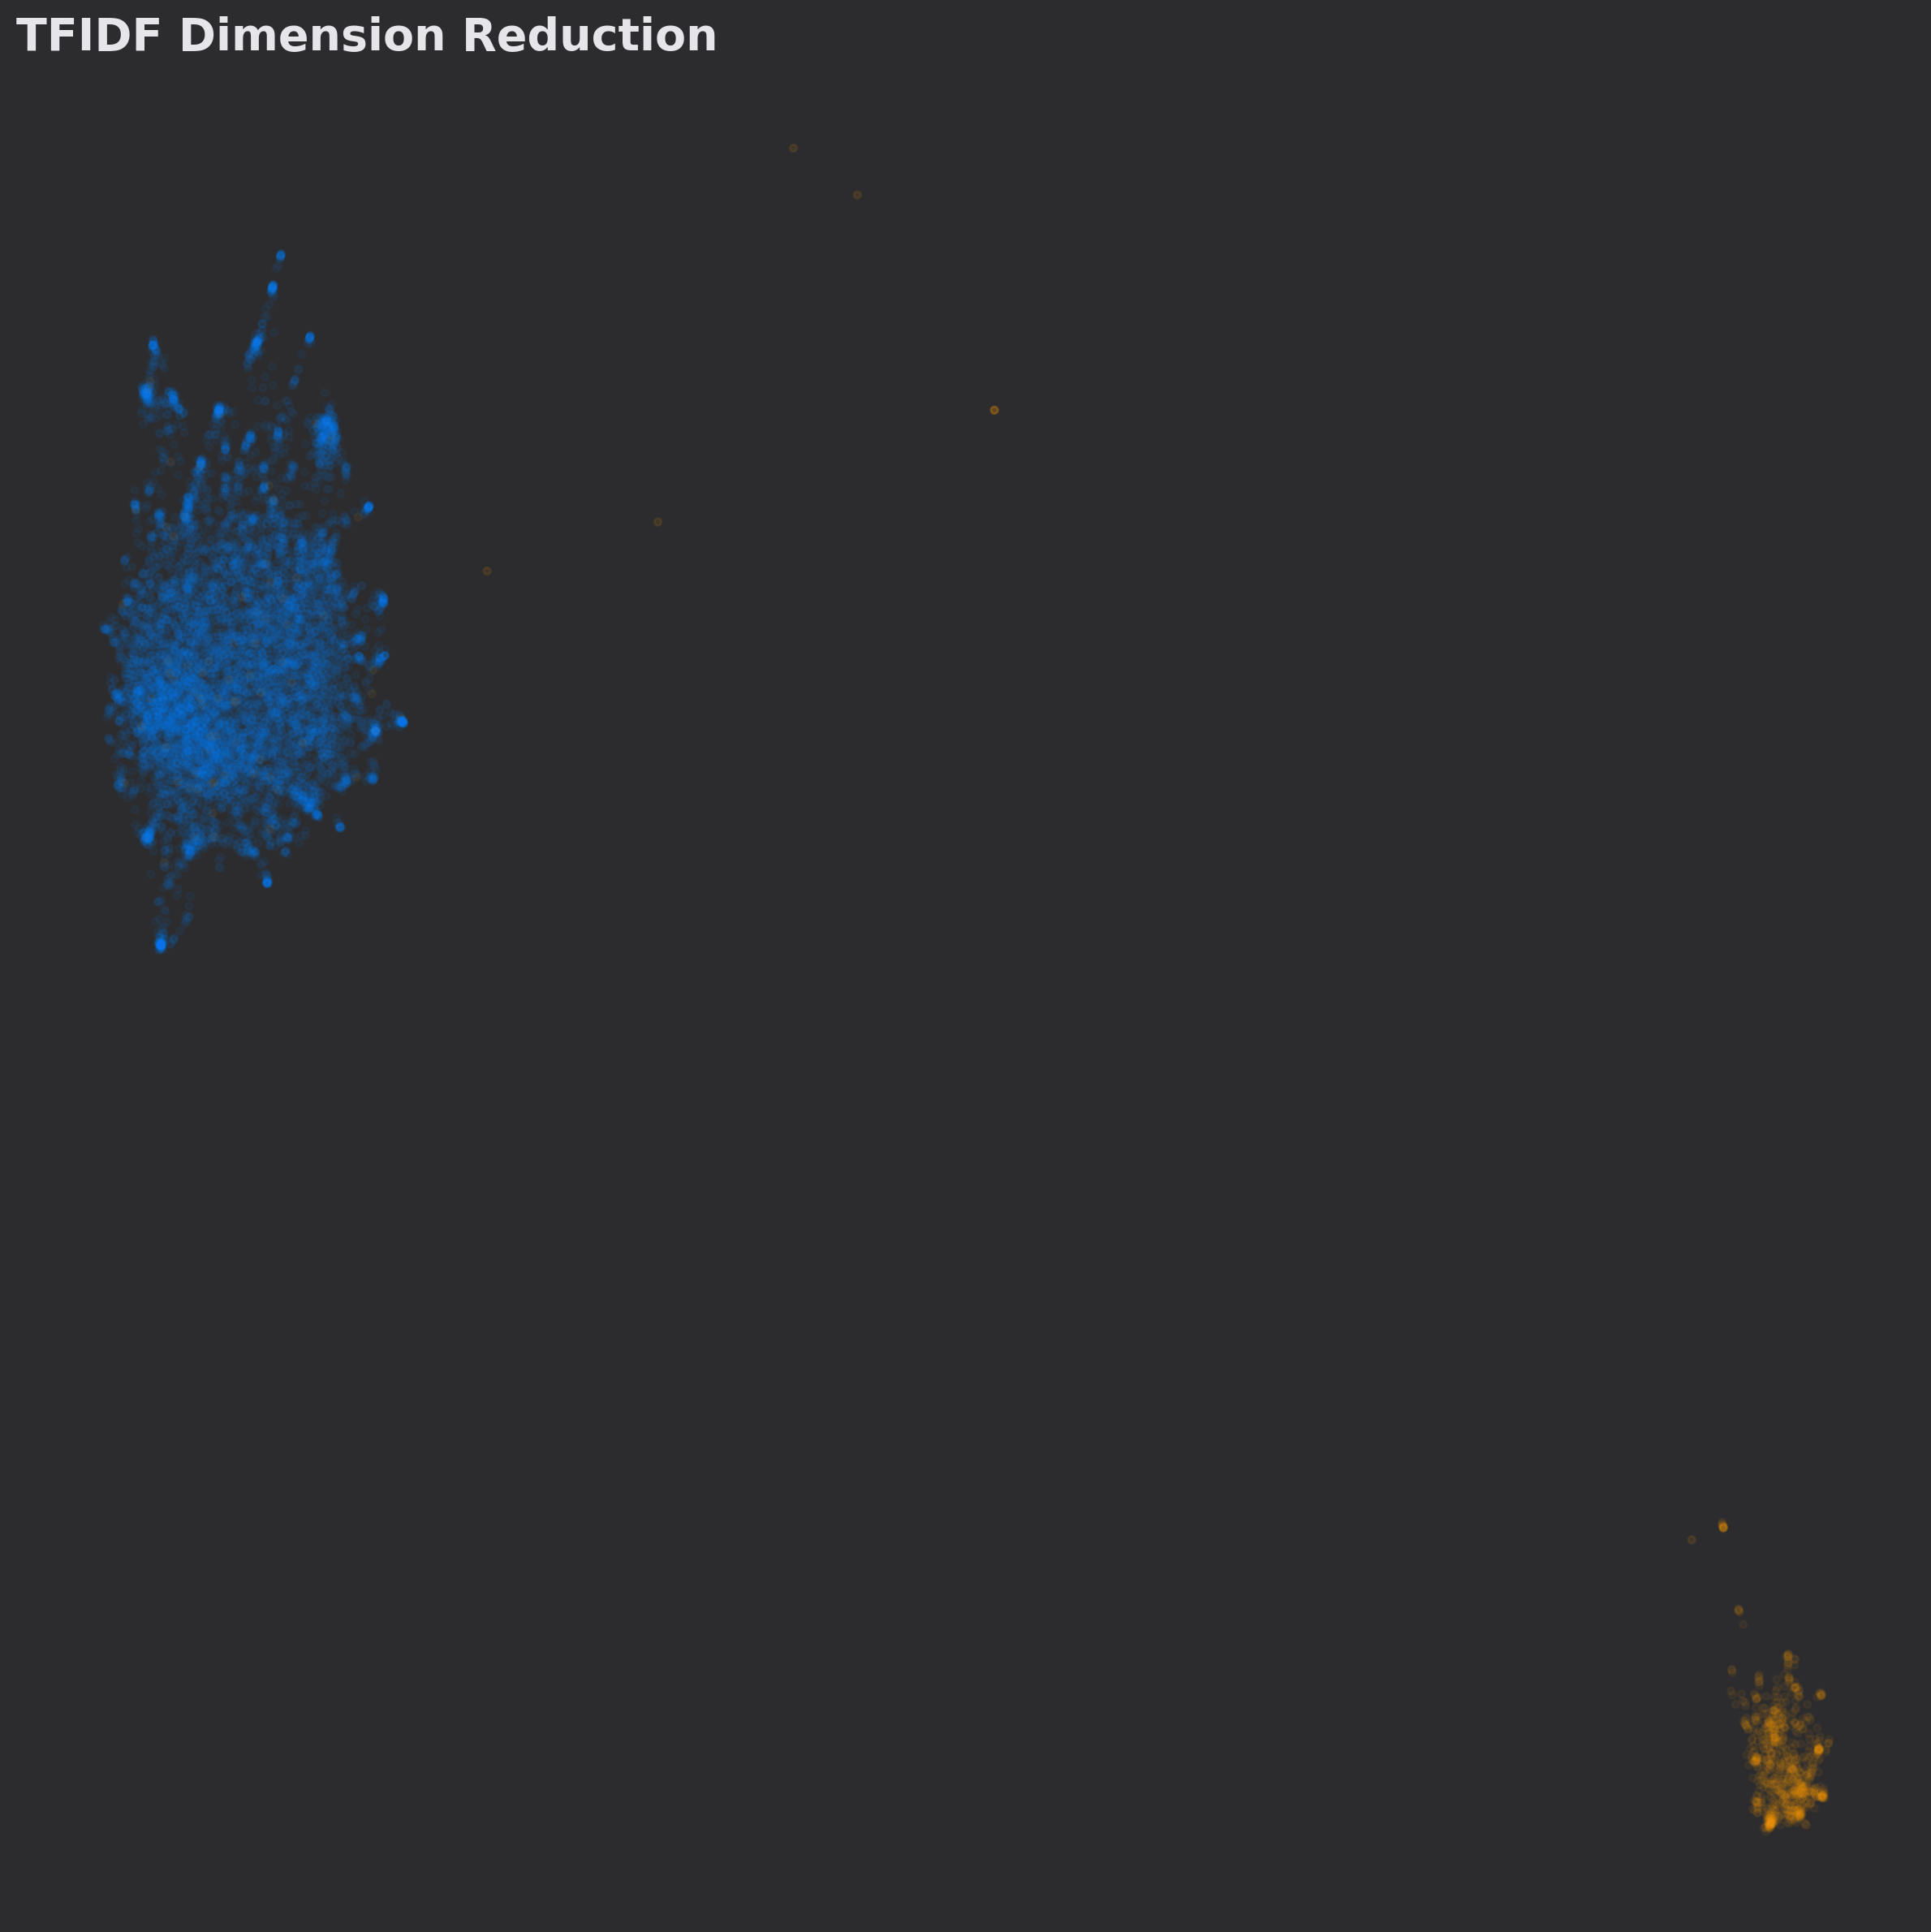

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.axis('off')

ax.scatter(x=dr[:,0], y=dr[:,1], s=10, alpha=0.05, c=color)
ax.set_title('TFIDF Dimension Reduction', loc='left', fontsize=20, fontweight='bold')

fig.tight_layout()
plt.show()

You can see that the trend comes out with just tf-idf + umap.

## Reference

- https://textvis.lnu.se/
- https://jehyunlee.github.io/2021/02/11/Python-DS-61-mpl_colormapkde/ (korean document)

### Futher Readings

More text data analysis library.

- LIT : https://github.com/PAIR-code/lit
    - interactive model-understanding tool for NLP models
- Ecco : https://www.eccox.io/
    - Ecco is a python library that creates interactive visualizations allowing you to explore what your NLP Language Model is thinking.
- https://github.com/jbesomi/texthero
- https://github.com/bmabey/pyLDAvis
- https://github.com/JasonKessler/scattertext
- https://github.com/ryanjgallagher/shifterator